In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("dataset/Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
X = df["area"].values
y = df["price"].values


In [ ]:
X_mean_feat = X.mean()
X_std_feat = X.std()

X_norm_feat = (X - X_mean_feat) / X_std_feat


In [6]:
def predict(x, w, b):
    return w * x + b


In [7]:
def compute_cost(x, y, w, b):
    m = len(x)
    return (1/(2*m)) * np.sum((predict(x, w, b) - y)**2)


In [8]:
def gradient_descent(x, y, w, b, alpha, iterations):
    m = len(x)
    for _ in range(iterations):
        y_pred = predict(x, w, b)
        dw = (1/m) * np.sum((y_pred - y) * x)
        db = (1/m) * np.sum(y_pred - y)
        w -= alpha * dw
        b -= alpha * db
    return w, b


In [ ]:
w, b = gradient_descent(
    X_norm_feat,
    y,
    w=0,
    b=0,
    alpha=0.01,
    iterations=20000
)

print(w, b)


1001630.4758732292 4766729.247706376


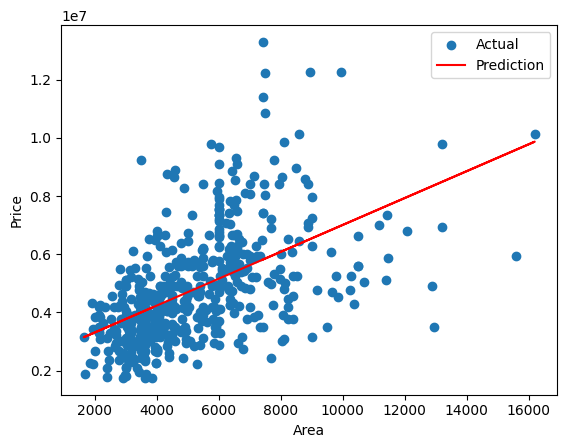

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y, label="Actual")
plt.plot(X, predict(X_norm_feat, w, b), label="Prediction", color="red")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.show()


# Multivariable Linear Regression 

In [21]:
import pandas as pd
import numpy as np

df = pd.read_csv("dataset/Housing.csv")

df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [41]:

features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
X = df[features].values
y = df["price"].values

print("X shape:", X.shape) 
print("y shape:", y.shape)

X shape: (545, 5)
y shape: (545,)



## Feature Scaling 
$$
Z = \frac{X - \mu}{\sigma}
$$


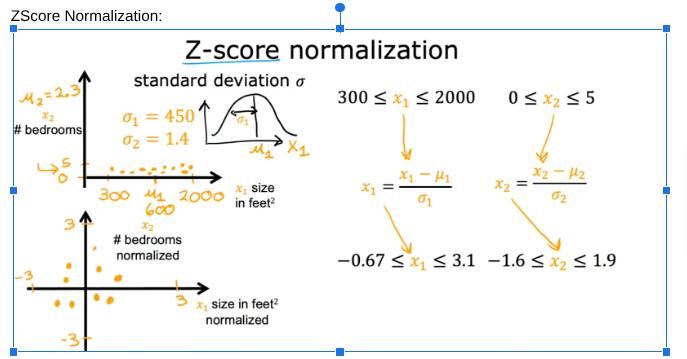

In [45]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

X_norm = (X - X_mean) / X_std


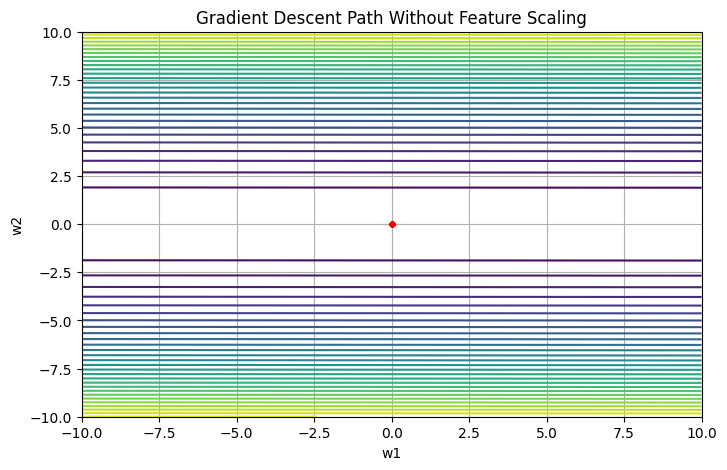

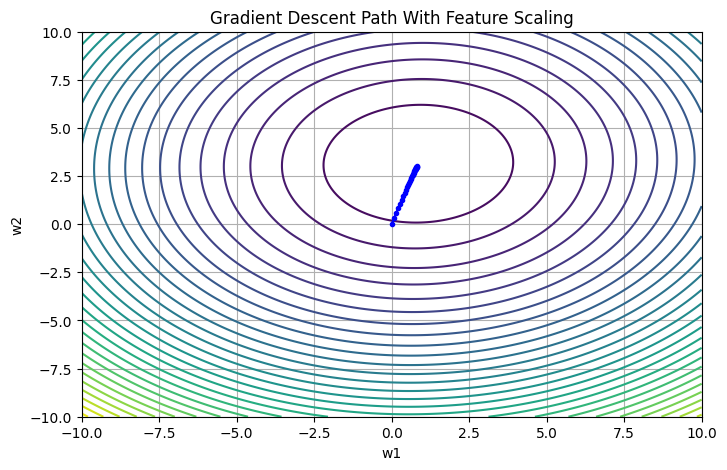

In [46]:
# contour_feature_scaling.py
import numpy as np
import matplotlib.pyplot as plt

# ------------------ Generate synthetic data ------------------
np.random.seed(1)
m = 100
x1 = np.random.rand(m) * 1        # small scale
x2 = np.random.rand(m) * 1000     # large scale
y = 3 * x1 + 0.01 * x2 + np.random.randn(m) * 0.5

X = np.c_[x1, x2]

# ------------------ Feature scaling ------------------
X_mean_feat = X.mean(axis=0)
X_std_feat = X.std(axis=0)
X_norm_feat = (X - X_mean_feat) / X_std_feat

# ------------------ Cost function ------------------
def compute_cost(w, X, y):
    preds = X @ w
    return np.mean((preds - y) ** 2) / 2

# ------------------ Gradient Descent ------------------
def gradient_descent(X, y, alpha=0.1, iters=30):
    w = np.zeros(2)
    path = [w.copy()]
    for _ in range(iters):
        grad = X.T @ (X @ w - y) / len(y)
        w = w - alpha * grad
        path.append(w.copy())
    return np.array(path)

# Compute GD paths
path_unscaled = gradient_descent(X, y, alpha=1e-6, iters=30)
path_scaled   = gradient_descent(X_norm_feat, y, alpha=0.1, iters=30)

# ------------------ Prepare grid for contour ------------------
w1 = np.linspace(-10, 10, 200)
w2 = np.linspace(-10, 10, 200)
W1, W2 = np.meshgrid(w1, w2)

def contour_cost(X):
    J = np.zeros_like(W1)
    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            w = np.array([W1[i, j], W2[i, j]])
            J[i, j] = compute_cost(w, X, y)
    return J

J_unscaled = contour_cost(X)
J_scaled   = contour_cost(X_norm_feat)

# ------------------ Plot ------------------
plt.figure(figsize=(8,5))
plt.contour(W1, W2, J_unscaled, levels=30)
plt.plot(path_unscaled[:,0], path_unscaled[:,1], 'ro-', markersize=3)
plt.title("Gradient Descent Path Without Feature Scaling")
plt.xlabel("w1")
plt.ylabel("w2")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.contour(W1, W2, J_scaled, levels=30)
plt.plot(path_scaled[:,0], path_scaled[:,1], 'bo-', markersize=3)
plt.title("Gradient Descent Path With Feature Scaling")
plt.xlabel("w1")
plt.ylabel("w2")
plt.grid(True)
plt.show()


## Vectorized y^

In [47]:
def predict(X, w, b):
    return np.dot(X, w) + b


## vectorized Cost Function 

In [ ]:
def compute_cost(X, y, w, b):
    m = len(y)
    errors =  predict(X,w,b) - y
    return (1/(2*m))* np.dot(errors,errors) # it is same as writing sum((y_hat - y)^2)




    # errors = predict(X, w, b) - y
    # return (1/(2*m)) * np.dot(errors, errors)


## Gardient Descent

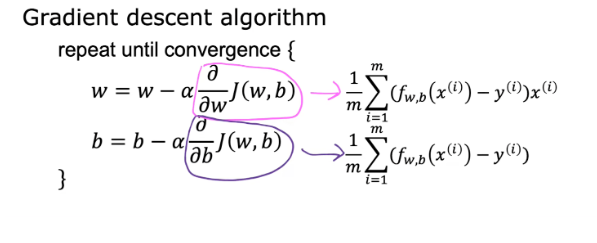

In [56]:
def gradient_descent(X, y, w, b, alpha, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        errors = predict(X,w,b) - y
        dw = (1/m) * np.dot(X.T,errors )
        # dw = (1/m) * np.dot(X.T, errors)
        db = (1/m) * np.sum(errors)


        w = w - alpha * dw
        b = b - alpha * db
        cost_history.append(compute_cost(X,y,w,b))
    
    return w, b, cost_history 


In [57]:
w = np.zeros(X_norm.shape[1])
b = 0

w, b, cost_history = gradient_descent(
    X_norm, y, w, b,
    alpha=0.01,
    iterations=3000
)

print("Weights:", w)
print("Bias:", b)


Weights: [0.86167091 3.14386626]
Bias: 6.354628774321617


In [58]:
print("Final cost:", cost_history[-1])


Final cost: 0.13135737559251412


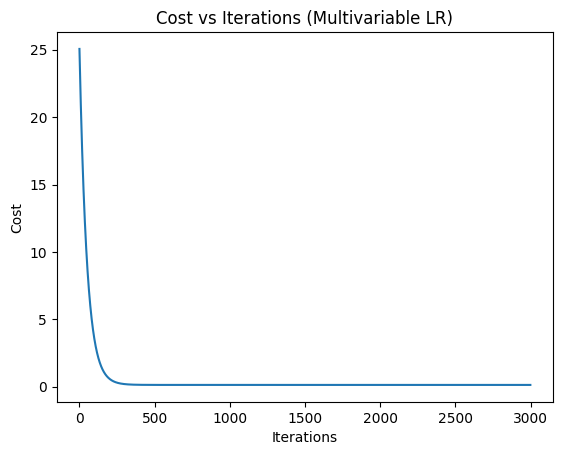

In [59]:
import matplotlib.pyplot as plt

plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations (Multivariable LR)")
plt.show()
